# Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Loading Dataset

In [2]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# Performing EDA

In [3]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


In the dataset  features like "Age," "Annual Income," and "Spending Score" have different scales. "Age" is likely to be in the range of tens, "Annual Income" could be in the thousands, and "Spending Score" is on a scale of 1-100. The feature scales can affect the performance and convergence of K-means.Therefore ,we will use StandardScaler to standardize the features before applying Kmeans.

In [6]:
from sklearn.preprocessing import StandardScaler,LabelEncoder

le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])

scaler = StandardScaler()
data_scaled = scaler.fit_transform(df)

pd.DataFrame(data_scaled)

#statistics of  scaled data

pd.DataFrame(data_scaled).describe()

,0,1,2,3,4
count,200.000000,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02
mean,0.000000,3.108624e-17,-1.021405e-16,-2.131628e-16,-1.465494e-16
std,1.002509,1.002509e+00,1.002509e+00,1.002509e+00,1.002509e+00
min,-1.723412,-8.864053e-01,-1.496335e+00,-1.738999e+00,-1.910021e+00
25%,-0.861706,-8.864053e-01,-7.248436e-01,-7.275093e-01,-5.997931e-01
50%,0.000000,-8.864053e-01,-2.045351e-01,3.587926e-02,-7.764312e-03
75%,0.861706,1.128152e+00,7.284319e-01,6.656748e-01,8.851316e-01
max,1.723412,1.128152e+00,2.235532e+00,2.917671e+00,1.894492e+00


# Applying Kmeans

In [7]:
# Apply K-means
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(data_scaled)

KMeans(n_clusters=3, random_state=42)

In [8]:
kmeans.inertia_

573.8386868500046

Text(0, 0.5, 'Inertia')

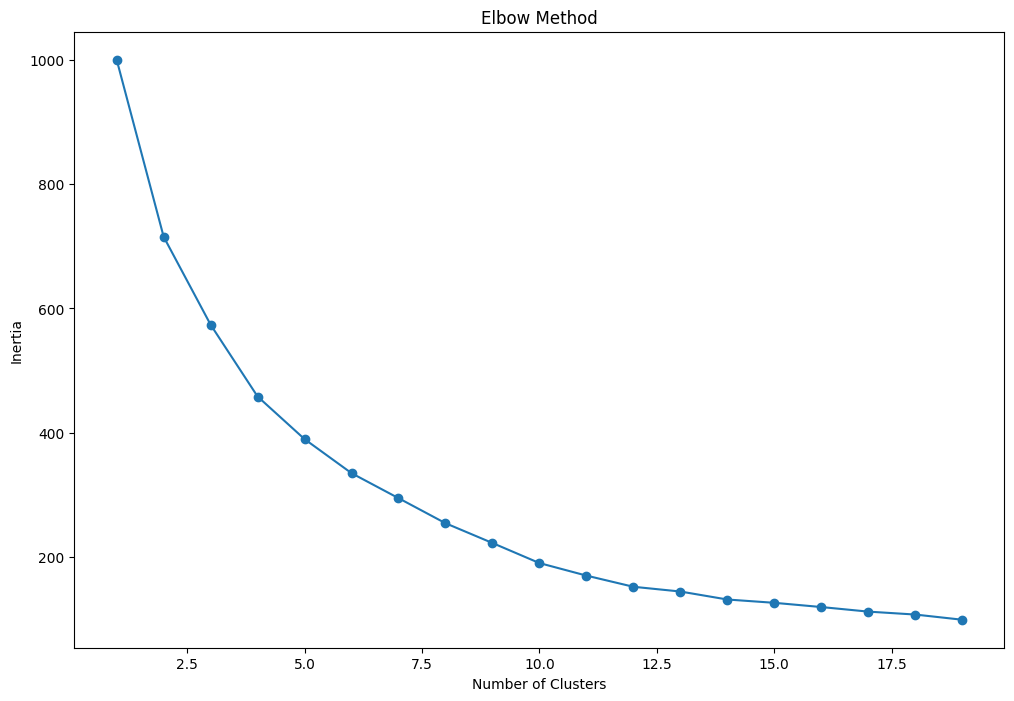

In [9]:
# fitting multiple Kmeans algorithms and storing the values in empty list
SSE =[]
for cluster in range (1,20):
    kmeans = KMeans(n_clusters=cluster,init='k-means++')
    kmeans.fit(data_scaled)
    SSE.append(kmeans.inertia_)

# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range (1,20), 'SSE':SSE})
plt.figure(figsize=(12,8))
plt.plot(frame['Cluster'],frame['SSE'],marker = 'o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')


In [10]:
kmeans = KMeans(n_clusters=5,init='k-means++', random_state=0)
kmeans.fit(data_scaled)
pred = kmeans.predict(data_scaled)


In [11]:
frame = pd.DataFrame(data_scaled)
frame['Cluster'] = pred
frame['Cluster'].value_counts()




3    53
4    41
2    40
0    37
1    29
Name: Cluster, dtype: int64

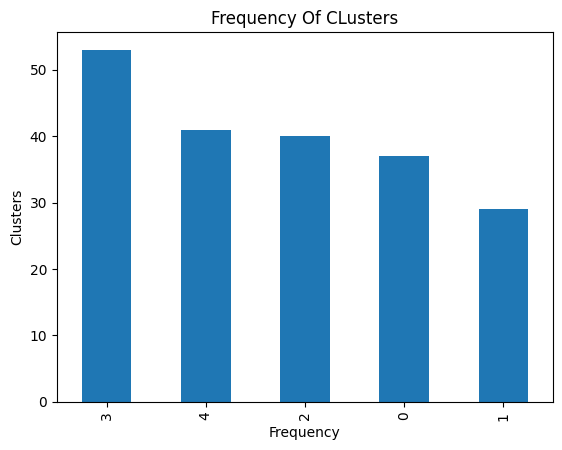

In [12]:
plt.title("Frequency Of CLusters")
pd.value_counts(frame["Cluster"]).plot.bar()
plt.xlabel('Frequency')
plt.ylabel("Clusters")
plt.show()

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import adjusted_rand_score
from sklearn.datasets import make_blobs

X, true_labels = make_blobs(n_samples=300, centers=4, random_state=42)
X_train, X_test, true_labels_train, true_labels_test = train_test_split(X, true_labels, test_size=0.2, random_state=42)


seed_values = [42, 123, 789]

for seed in seed_values:
    # Fit KMeans model with different random seed values
    kmeans = KMeans(n_clusters=5, random_state=seed)
    kmeans.fit(X_train)

    # Get the adjusted Rand index on the test set
    ari_test = adjusted_rand_score(true_labels_test, kmeans.predict(X_test))
    print(f"Adjusted Rand Index with seed {seed}: {ari_test*100}")

Adjusted Rand Index with seed 42: 89.73480921288605
Adjusted Rand Index with seed 123: 88.73272521549212
Adjusted Rand Index with seed 789: 89.0678343874926
